## Calc of a Density Estimation sample

-5.829145728643217

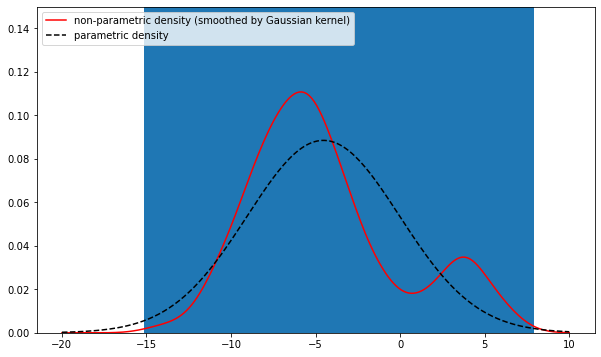

In [3]:
# the calc of a Density Estimation?
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

np.random.seed(0)
gaussian1 = -6 + 3 * np.random.randn(1700)
gaussian2 = 4 + 1.5 * np.random.randn(300)
gaussian_mixture = np.hstack([gaussian1, gaussian2])

df = pd.DataFrame(gaussian_mixture, columns=['data'])

# non-parametric pdf
nparam_density = stats.kde.gaussian_kde(df.values.ravel())
x = np.linspace(-20, 10, 200)
nparam_density = nparam_density(x)

# parametric fit: assume normal distribution
loc_param, scale_param = stats.norm.fit(df)
param_density = stats.norm.pdf(x, loc=loc_param, scale=scale_param)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df.values, bins=30)
ax.plot(x, nparam_density, 'r-', label='non-parametric density (smoothed by Gaussian kernel)')
ax.plot(x, param_density, 'k--', label='parametric density')
ax.set_ylim([0, 0.15])
ax.legend(loc='best')


# get mode: exhastive search
x[np.argsort(nparam_density)[-1]]


